<a href="https://colab.research.google.com/github/zacherymoy/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/zacherymoy/Zachery_Moy_Making_Data_backed_Assertions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Lecture - generating a confounding variable

The prewatch material told a story about a hypothetical health condition where both the drug usage and overall health outcome were related to gender - thus making gender a confounding variable, obfuscating the possible relationship between the drug and the outcome.

Let's use Python to generate data that actually behaves in this fashion!

In [1]:
import random
dir(random)  # Reminding ourselves what we can do here

['BPF',
 'LOG4',
 'NV_MAGICCONST',
 'RECIP_BPF',
 'Random',
 'SG_MAGICCONST',
 'SystemRandom',
 'TWOPI',
 '_BuiltinMethodType',
 '_MethodType',
 '_Sequence',
 '_Set',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_acos',
 '_bisect',
 '_ceil',
 '_cos',
 '_e',
 '_exp',
 '_inst',
 '_itertools',
 '_log',
 '_pi',
 '_random',
 '_sha512',
 '_sin',
 '_sqrt',
 '_test',
 '_test_generator',
 '_urandom',
 '_warn',
 'betavariate',
 'choice',
 'choices',
 'expovariate',
 'gammavariate',
 'gauss',
 'getrandbits',
 'getstate',
 'lognormvariate',
 'normalvariate',
 'paretovariate',
 'randint',
 'random',
 'randrange',
 'sample',
 'seed',
 'setstate',
 'shuffle',
 'triangular',
 'uniform',
 'vonmisesvariate',
 'weibullvariate']

In [2]:
# Let's think of another scenario:
# We work for a company that sells accessories for mobile phones.
# They have an ecommerce site, and we are supposed to analyze logs
# to determine what sort of usage is related to purchases, and thus guide
# website development to encourage higher conversion.

# The hypothesis - users who spend longer on the site tend
# to spend more. Seems reasonable, no?

# But there's a confounding variable! If they're on a phone, they:
# a) Spend less time on the site, but
# b) Are more likely to be interested in the actual products!

# Let's use namedtuple to represent our data

from collections import namedtuple
# purchased and mobile are bools, time_on_site in seconds
User = namedtuple('User', ['purchased','time_on_site', 'mobile'])

example_user = User(False, 12, False)
print(example_user)

User(purchased=False, time_on_site=12, mobile=False)


In [3]:
random.uniform(10, 600)

173.18337123284877

In [10]:
import numpy as np

np.random.normal(10, 2)

10.358126707846928

In [11]:
# And now let's generate 1000 example users
# 750 mobile, 250 not (i.e. desktop)
# A desktop user has a base conversion likelihood of 10%
# And it goes up by 1% for each 15 seconds they spend on the site
# And they spend anywhere from 10 seconds to 10 minutes on the site (uniform)
# Mobile users spend on average half as much time on the site as desktop
# But have three times as much base likelihood of buying something

users = []

for _ in range(250):
  # Desktop users
  # time_on_site = random.uniform(10, 600)
  time_on_site = np.random.normal(9.4*60, 3*60)
  purchased = random.random() < 0.1 + (time_on_site / 1500)
  users.append(User(purchased, time_on_site, False))
  
for _ in range(750):
  # Mobile users
  # time_on_site = random.uniform(5, 300)
  time_on_site = np.random.normal(7.5*60, 2*60)
  purchased = random.random() < 0.1 + (time_on_site / 1500)
  purchased = random.random() < 0.3 + (time_on_site / 1500)
  users.append(User(purchased, time_on_site, True))
  
random.shuffle(users)
users[:10]

[User(purchased=True, time_on_site=533.9790378000006, mobile=True),
 User(purchased=True, time_on_site=418.17643295537624, mobile=True),
 User(purchased=True, time_on_site=433.3051457405845, mobile=True),
 User(purchased=False, time_on_site=526.5961702340738, mobile=True),
 User(purchased=True, time_on_site=393.73489379631314, mobile=True),
 User(purchased=True, time_on_site=444.13842519765944, mobile=False),
 User(purchased=True, time_on_site=479.7626928475264, mobile=True),
 User(purchased=False, time_on_site=366.27882598829973, mobile=True),
 User(purchased=True, time_on_site=512.6267587970849, mobile=True),
 User(purchased=False, time_on_site=352.0986485027672, mobile=True)]

In [12]:
# Let's put this in a dataframe so we can look at it more easily
import pandas as pd
user_data = pd.DataFrame(users)
user_data.head()

,purchased,time_on_site,mobile
0,True,533.979038,True
1,True,418.176433,True
2,True,433.305146,True
3,False,526.596170,True
4,True,393.734894,True


In [14]:
user_data['time_on_site_min'] = user_data['time_on_site'] / 60
user_data.head()

,purchased,time_on_site,mobile,time_on_site_min
0,True,533.979038,True,8.899651
1,True,418.176433,True,6.969607
2,True,433.305146,True,7.221752
3,False,526.596170,True,8.776603
4,True,393.734894,True,6.562248


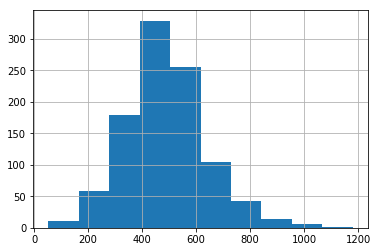

In [13]:
user_data.time_on_site.hist()

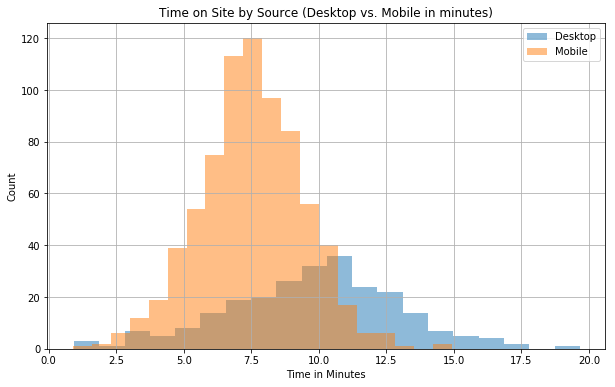

In [18]:
import matplotlib.pyplot as plt

user_data.groupby('mobile').time_on_site_min.hist(bins=20, alpha=0.5, figsize=(10,6));
plt.title('Time on Site by Source (Desktop vs. Mobile in minutes)');
plt.ylabel('Count')
plt.xlabel('Time in Minutes')
plt.legend(['Desktop', 'Mobile']);

In [19]:
user_data[user_data.time_on_site < 0.0]

,purchased,time_on_site,mobile,time_on_site_min


In [0]:
user_data.loc[user_data['time_on_site'] < 0.0, 'time_on_site'] = 0.0

In [20]:
# Let's use crosstabulation to try to see what's going on
pd.crosstab(user_data['purchased'], user_data['time_on_site'])

time_on_site,53.07380480058259,56.05982085292743,77.04710719980744,82.82815569060347,102.20064506098794,135.56633961586255,138.2101390650052,140.03233498414613,141.82579494837404,157.30744338014625,159.41381323260612,167.43450949428592,174.7776350690081,181.07729472201152,181.2076402420953,184.68705407840582,188.04017932842072,190.06792854254707,192.8939413595669,196.4019366034292,202.07040411599803,203.77355386117384,206.27818029458297,208.19962216637617,209.99744901830678,212.52586425429416,213.88003551191076,215.68214313306078,216.93358715792647,218.63320784261032,221.51139985825014,221.75768210503418,222.30593510624894,226.62000902034183,228.04840242773867,231.48872487303552,231.72052516040856,231.9729186259585,238.57753113498995,239.08074236496384,...,778.3920088860127,778.609264277234,779.266765534103,780.6163895213131,794.649758455132,794.6878698257447,797.5834148515885,804.8488547660452,805.3394920417562,807.2139177080635,808.7421080282988,811.3002976711728,816.2909378983684,817.9510855011813,823.1596921795349,836.6967543625636,838.3492167346903,840.6697652954599,840.9366519397404,843.0752821743658,845.2162143637211,846.3801050023649,848.74508164629,850.7119129327044,862.8326566766343,872.4499492089806,891.9680756180054,896.6219427159083,911.8450678455852,916.5174525660448,936.1361360934204,939.1399172045976,948.7563795926142,957.005037472421,994.3384064298576,998.8694721685854,1008.063347547879,1044.161540008815,1059.0713785865014,1179.7278802449111
purchased,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
False,1,1,1,1,1,1,1,0,1,1,0,0,0,1,0,1,0,1,0,1,1,1,0,1,1,1,1,1,1,0,1,1,1,0,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
True,0,0,0,0,0,0,0,1,0,0,1,1,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,...,1,1,1,1,1,1,1,1,1,0,0,1,1,0,1,0,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1


In [21]:
# OK, that's not quite what we want
# Time is continuous! We need to put it in discrete buckets
# Pandas calls these bins, and pandas.cut helps make them

time_bins = pd.cut(user_data['time_on_site'], 5)  # 5 equal-sized bins
pd.crosstab(time_bins, user_data['purchased'], normalize='index')

purchased,False,True
time_on_site,,
"(51.947, 278.405]",0.681159,0.318841
"(278.405, 503.735]",0.466535,0.533465
"(503.735, 729.066]",0.397222,0.602778
"(729.066, 954.397]",0.250000,0.750000
"(954.397, 1179.728]",0.142857,0.857143


In [22]:
# We can make this a bit clearer by normalizing (getting %)
pd.crosstab(user_data['purchased'], time_bins, normalize='columns')

TypeError: ignored

In [23]:
# That seems counter to our hypothesis
# More time on the site can actually have fewer purchases

# But we know why, since we generated the data!
# Let's look at mobile and purchased
pd.crosstab(user_data['purchased'], user_data['mobile'], normalize='columns')

mobile,False,True
purchased,,
False,0.48,0.429333
True,0.52,0.570667


In [24]:
# Yep, mobile users are more likely to buy things
# But we're still not seeing the *whole* story until we look at all 3 at once

# Live/stretch goal - how can we do that?
pd.crosstab(time_bins, [user_data['purchased'], user_data['mobile']], normalize='columns')

purchased               False               True           
mobile                  False     True      False     True 
time_on_site                                               
(51.947, 278.405]    0.100000  0.108696  0.023077  0.044393
(278.405, 503.735]   0.283333  0.630435  0.207692  0.570093
(503.735, 729.066]   0.516667  0.251553  0.438462  0.373832
(729.066, 954.397]   0.091667  0.009317  0.284615  0.011682
(954.397, 1179.728]  0.008333  0.000000  0.046154  0.000000

In [25]:
pd.crosstab(time_bins, user_data['purchased'], normalize='index')

purchased,False,True
time_on_site,,
"(51.947, 278.405]",0.681159,0.318841
"(278.405, 503.735]",0.466535,0.533465
"(503.735, 729.066]",0.397222,0.602778
"(729.066, 954.397]",0.250000,0.750000
"(954.397, 1179.728]",0.142857,0.857143


Stanford Open Police Project
Link: 
https://openpolicing.stanford.edu/data/

## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

In [0]:
# TODO - your code here
# Use what we did live in lecture as an example

# HINT - you can find the raw URL on GitHub and potentially use that
# to load the data with read_csv, or you can upload it yourself

In [0]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/zacherymoy/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module3-databackedassertions/persons.csv')

In [36]:
del df['Unnamed: 0']
df.head()

,age,weight,exercise_time
0,44,118,192
1,41,161,35
2,46,128,220
3,39,216,57
4,28,116,182


In [39]:
pd.crosstab(df['weight'], df['exercise_time'])

time_bins = pd.cut(df['weight'], 5)  # 5 equal-sized bins
pd.crosstab(time_bins, df['exercise_time'], normalize='index')

exercise_time,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,30,31,32,33,34,35,36,37,38,39,40,...,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,296,297,298,299,300
weight,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"(99.854, 129.2]",0.000000,0.000000,0.002667,0.005333,0.002667,0.000000,0.000000,0.000000,0.002667,0.000000,0.005333,0.000000,0.000000,0.002667,0.002667,0.002667,0.005333,0.005333,0.002667,0.000000,0.002667,0.008000,0.000000,0.002667,0.005333,0.002667,0.000000,0.002667,0.002667,0.002667,0.000000,0.000000,0.002667,0.005333,0.005333,0.008000,0.005333,0.000000,0.000000,0.000000,...,0.002667,0.010667,0.005333,0.002667,0.005333,0.010667,0.005333,0.008000,0.002667,0.000000,0.008000,0.002667,0.000000,0.008,0.000000,0.000000,0.00800,0.005333,0.002667,0.005333,0.010667,0.00000,0.008000,0.000000,0.005333,0.002667,0.002667,0.010667,0.005333,0.016000,0.000000,0.005333,0.00000,0.005333,0.002667,0.010667,0.005333,0.008000,0.005333,0.005333
"(129.2, 158.4]",0.000000,0.002985,0.000000,0.000000,0.000000,0.002985,0.005970,0.002985,0.000000,0.002985,0.000000,0.000000,0.000000,0.002985,0.000000,0.005970,0.000000,0.005970,0.002985,0.008955,0.002985,0.008955,0.002985,0.000000,0.002985,0.000000,0.002985,0.002985,0.002985,0.002985,0.005970,0.005970,0.000000,0.000000,0.005970,0.000000,0.000000,0.000000,0.000000,0.002985,...,0.005970,0.000000,0.005970,0.008955,0.005970,0.002985,0.002985,0.002985,0.000000,0.002985,0.008955,0.000000,0.000000,0.000,0.008955,0.002985,0.00597,0.011940,0.005970,0.002985,0.005970,0.00597,0.002985,0.002985,0.002985,0.002985,0.000000,0.002985,0.002985,0.002985,0.002985,0.002985,0.00597,0.002985,0.000000,0.000000,0.005970,0.008955,0.000000,0.008955
"(158.4, 187.6]",0.003876,0.000000,0.007752,0.003876,0.007752,0.007752,0.000000,0.000000,0.003876,0.000000,0.000000,0.000000,0.007752,0.000000,0.003876,0.003876,0.007752,0.011628,0.007752,0.000000,0.003876,0.007752,0.003876,0.000000,0.003876,0.000000,0.000000,0.000000,0.000000,0.011628,0.011628,0.003876,0.011628,0.003876,0.011628,0.003876,0.000000,0.000000,0.003876,0.007752,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003876,0.000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"(187.6, 216.8]",0.005587,0.011173,0.011173,0.000000,0.011173,0.005587,0.011173,0.000000,0.000000,0.011173,0.011173,0.000000,0.000000,0.016760,0.005587,0.005587,0.005587,0.016760,0.005587,0.005587,0.011173,0.016760,0.022346,0.000000,0.005587,0.005587,0.000000,0.011173,0.011173,0.005587,0.016760,0.000000,0.005587,0.005587,0.000000,0.005587,0.016760,0.027933,0.000000,0.005587,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"(216.8, 246.0]",0.000000,0.018868,0.037736,0.056604,0.000000,0.056604,0.037736,0.000000,0.018868,0.000000,0.037736,0.018868,0.000000,0.018868,0.000000,0.000000,0.000000,0.018868,0.018868,0.018868,0.000000,0.018868,0.018868,0.018868,0.000000,0.018868,0.018868,0.037736,0.037736,0.018868,0.000000,0.000000,0.018868,0.037736,0.000000,0.037736,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.

AttributeError: ignored

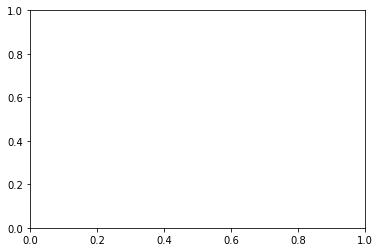

In [42]:
bins = pd.cut(df['weight'], 5)  # 5 equal-sized bins
df.plot.bar('weight', 'exercise_time', bins=bins)

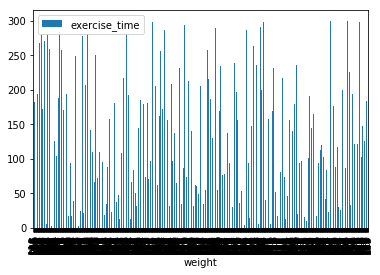

In [43]:
df.plot.bar('weight', 'exercise_time')

In [44]:
pd.crosstab(df['weight'], df['age'])

time_bins = pd.cut(df['weight'], 5)  # 5 equal-sized bins
pd.crosstab(time_bins, df['age'], normalize='index')

age,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80
weight,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"(99.854, 129.2]",0.018667,0.010667,0.016000,0.013333,0.010667,0.024000,0.016000,0.018667,0.008000,0.016000,0.024000,0.024000,0.013333,0.018667,0.018667,0.026667,0.037333,0.021333,0.013333,0.024000,0.029333,0.024000,0.021333,0.032000,0.010667,0.013333,0.016000,0.013333,0.016000,0.008000,0.016000,0.010667,0.016000,0.024000,0.018667,0.016000,0.018667,0.021333,0.00800,0.021333,0.013333,0.021333,0.002667,0.018667,0.010667,0.008000,0.010667,0.010667,0.005333,0.010667,0.010667,0.018667,0.021333,0.021333,0.005333,0.013333,0.013333,0.013333,0.010667,0.008000,0.005333,0.013333,0.005333
"(129.2, 158.4]",0.023881,0.020896,0.011940,0.014925,0.026866,0.014925,0.011940,0.020896,0.026866,0.008955,0.029851,0.023881,0.020896,0.017910,0.005970,0.020896,0.026866,0.008955,0.005970,0.005970,0.023881,0.011940,0.020896,0.029851,0.005970,0.014925,0.020896,0.005970,0.008955,0.014925,0.008955,0.032836,0.008955,0.011940,0.011940,0.008955,0.008955,0.026866,0.01791,0.017910,0.008955,0.023881,0.014925,0.020896,0.017910,0.017910,0.026866,0.011940,0.008955,0.023881,0.011940,0.026866,0.014925,0.014925,0.014925,0.000000,0.008955,0.020896,0.008955,0.008955,0.011940,0.008955,0.008955
"(158.4, 187.6]",0.011628,0.023256,0.019380,0.023256,0.011628,0.007752,0.015504,0.007752,0.007752,0.015504,0.000000,0.023256,0.023256,0.015504,0.031008,0.023256,0.015504,0.011628,0.015504,0.003876,0.011628,0.019380,0.015504,0.019380,0.007752,0.007752,0.023256,0.007752,0.011628,0.019380,0.015504,0.019380,0.015504,0.015504,0.027132,0.011628,0.003876,0.011628,0.01938,0.011628,0.019380,0.011628,0.015504,0.019380,0.000000,0.011628,0.023256,0.015504,0.011628,0.015504,0.011628,0.031008,0.019380,0.031008,0.011628,0.038760,0.031008,0.011628,0.019380,0.007752,0.011628,0.011628,0.019380
"(187.6, 216.8]",0.011173,0.027933,0.011173,0.011173,0.011173,0.027933,0.005587,0.005587,0.005587,0.016760,0.022346,0.016760,0.016760,0.000000,0.011173,0.016760,0.011173,0.027933,0.022346,0.016760,0.016760,0.011173,0.016760,0.022346,0.000000,0.000000,0.011173,0.005587,0.000000,0.033520,0.011173,0.011173,0.000000,0.033520,0.005587,0.000000,0.011173,0.022346,0.01676,0.039106,0.011173,0.016760,0.016760,0.011173,0.016760,0.027933,0.022346,0.016760,0.033520,0.016760,0.044693,0.022346,0.000000,0.011173,0.033520,0.011173,0.011173,0.016760,0.016760,0.022346,0.022346,0.011173,0.022346
"(216.8, 246.0]",0.000000,0.018868,0.000000,0.000000,0.018868,0.000000,0.037736,0.037736,0.000000,0.000000,0.018868,0.000000,0.000000,0.037736,0.018868,0.000000,0.000000,0.037736,0.000000,0.000000,0.000000,0.018868,0.000000,0.018868,0.000000,0.018868,0.000000,0.000000,0.018868,0.056604,0.018868,0.000000,0.000000,0.000000,0.018868,0.000000,0.018868,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.018868,0.037736,0.037736,0.000000,0.000000,0.037736,0.037736,0.018868,0.000000,0.018868,0.075472,0.037736,0.037736,0.037736,0.000000,0.018868,0.018868,0.018868,0.037736,0.094340


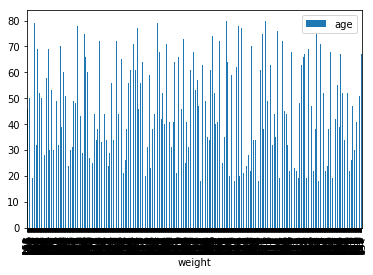

In [45]:
df.plot.bar('weight', 'age')

In [46]:
pd.crosstab(df['age'], df['exercise_time'])

time_bins = pd.cut(df['age'], 5)  # 5 equal-sized bins
pd.crosstab(time_bins, df['exercise_time'], normalize='index')

exercise_time,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,30,31,32,33,34,35,36,37,38,39,40,...,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,296,297,298,299,300
age,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"(17.938, 30.4]",0.003906,0.000000,0.000000,0.007812,0.000000,0.000000,0.007812,0.003906,0.000000,0.007812,0.003906,0.003906,0.000000,0.000000,0.000000,0.003906,0.003906,0.000000,0.000000,0.000000,0.003906,0.003906,0.007812,0.000000,0.003906,0.000000,0.000000,0.000000,0.011719,0.003906,0.007812,0.000000,0.003906,0.003906,0.007812,0.003906,0.003906,0.007812,0.000000,0.007812,...,0.003906,0.000000,0.007812,0.003906,0.007812,0.003906,0.003906,0.003906,0.000000,0.000000,0.000000,0.003906,0.000000,0.003906,0.000000,0.000000,0.000000,0.000000,0.000000,0.007812,0.011719,0.003906,0.007812,0.000000,0.000000,0.003906,0.000000,0.003906,0.000000,0.003906,0.000000,0.000000,0.000000,0.003906,0.003906,0.003906,0.000000,0.000000,0.000000,0.003906
"(30.4, 42.8]",0.003953,0.003953,0.003953,0.000000,0.007905,0.003953,0.000000,0.000000,0.000000,0.003953,0.000000,0.000000,0.003953,0.007905,0.000000,0.003953,0.000000,0.011858,0.011858,0.003953,0.003953,0.003953,0.000000,0.000000,0.003953,0.000000,0.000000,0.007905,0.000000,0.003953,0.000000,0.000000,0.007905,0.003953,0.007905,0.015810,0.007905,0.003953,0.000000,0.003953,...,0.003953,0.003953,0.003953,0.007905,0.000000,0.011858,0.000000,0.000000,0.000000,0.003953,0.011858,0.000000,0.000000,0.003953,0.000000,0.000000,0.003953,0.007905,0.000000,0.000000,0.000000,0.003953,0.003953,0.003953,0.003953,0.000000,0.000000,0.003953,0.003953,0.019763,0.000000,0.007905,0.007905,0.007905,0.000000,0.011858,0.007905,0.003953,0.003953,0.000000
"(42.8, 55.2]",0.000000,0.004484,0.004484,0.008969,0.000000,0.013453,0.004484,0.000000,0.000000,0.000000,0.008969,0.000000,0.000000,0.013453,0.000000,0.000000,0.004484,0.004484,0.000000,0.000000,0.000000,0.008969,0.004484,0.000000,0.004484,0.004484,0.000000,0.000000,0.004484,0.000000,0.000000,0.004484,0.004484,0.000000,0.000000,0.004484,0.000000,0.000000,0.000000,0.000000,...,0.004484,0.008969,0.004484,0.004484,0.004484,0.000000,0.008969,0.013453,0.004484,0.000000,0.004484,0.000000,0.004484,0.004484,0.008969,0.004484,0.013453,0.013453,0.008969,0.004484,0.008969,0.000000,0.004484,0.000000,0.004484,0.004484,0.004484,0.008969,0.004484,0.004484,0.004484,0.004484,0.000000,0.000000,0.000000,0.000000,0.008969,0.008969,0.004484,0.013453
"(55.2, 67.6]",0.000000,0.009009,0.004505,0.009009,0.004505,0.004505,0.004505,0.000000,0.000000,0.000000,0.013514,0.000000,0.000000,0.004505,0.009009,0.000000,0.000000,0.018018,0.004505,0.004505,0.000000,0.009009,0.004505,0.004505,0.004505,0.004505,0.004505,0.009009,0.000000,0.009009,0.018018,0.004505,0.009009,0.004505,0.004505,0.000000,0.000000,0.000000,0.004505,0.004505,...,0.000000,0.004505,0.000000,0.000000,0.004505,0.004505,0.000000,0.000000,0.000000,0.000000,0.009009,0.000000,0.000000,0.000000,0.004505,0.000000,0.004505,0.004505,0.004505,0.000000,0.004505,0.000000,0.000000,0.000000,0.004505,0.000000,0.000000,0.004505,0.004505,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013514,0.000000,0.004505
"(67.6, 80.0]",0.000000,0.000000,0.016260,0.000000,0.008130,0.008130,0.008130,0.000000,0.012195,0.000000,0.000000,0.000000,0.004065,0.000000,0.004065,0.012195,0.012195,0.012195,0.008130,0.012195,0.012195,0.024390,0.012195,0.004065,0.004065,0.004065,0.004065,0.008130,0.008130,0.012195,0.008130,0.004065,0.000000,0.012195,0.008130,0.004065,0.008130,0.008130,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

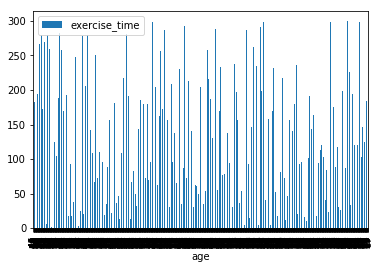

In [47]:
df.plot.bar('age', 'exercise_time')

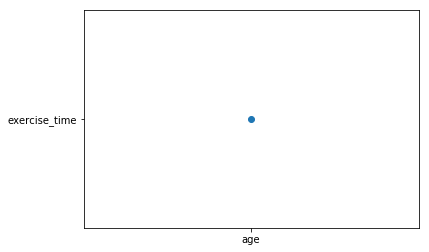

In [51]:
import matplotlib.pyplot as plt
plt.scatter('age', 'exercise_time')

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data?
2.  What are the relationships between the variables?
3.  Which relationships are "real", and which spurious?


1. Age: Continuous.
Weight: Continuous.
Exercise time: Continuous. 

2. No relationship between weight and exercise time (spurious). No relationship between age and weight (spurious). No relationship between age and exercise time (spurious). 

## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspired by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)